In [1]:
#32x32 image -> transform in different ways, randomly
#and then visualize: add input image, how it's transformed

#Types on noise to try:
#Random uniform noise
#Rotating, tilting, disforming
#Blurring - https://github.com/kornia/kornia-examples/blob/master/Resize-Antialias.ipynb
#Mirroring / flips - https://github.com/kornia/kornia-examples/blob/master/color_conversions.ipynb
#Pathes and rotated - https://github.com/kornia/kornia-examples/blob/master/geometry_generate_patch.ipynb


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.ndimage import rotate

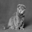

In [3]:
img = Image.open("test.jpg")

img_resized = img.resize((32, 32))
img_bw = img_resized.convert("L")

img_bw

In [4]:
#Apply random noise

def random_rgba(ori_img):
  myimg = ori_img.copy().astype(float)
  myimg[:,:] += np.random.rand(myimg.shape[0],myimg.shape[0]) *50
  return myimg


randomized_img = random_rgba(np.array(img_bw))

randomized_img

array([[106.56212519, 117.10314587,  96.77306061, ..., 128.80850591,
        129.18965281, 136.19967099],
       [ 95.03206563, 105.38086515, 134.13135148, ..., 139.8807696 ,
        130.82693712, 114.70980923],
       [125.93368031, 121.77171457, 137.7024061 , ..., 133.67597205,
        105.7649834 ,  95.75764083],
       ...,
       [121.44971242, 137.30994685, 133.69143325, ..., 158.77219227,
        131.10382886, 157.56569473],
       [127.46196222, 126.83224209, 145.34065402, ..., 140.40808228,
        123.04827446, 160.32383968],
       [140.23711348, 127.05753912, 135.1178589 , ..., 159.60798211,
        163.26159052, 132.02692178]])

16 201


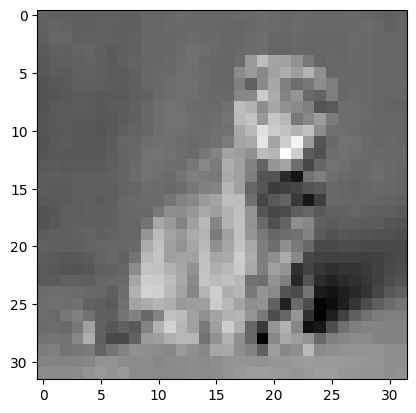

35.70403607565353 250.118757407464


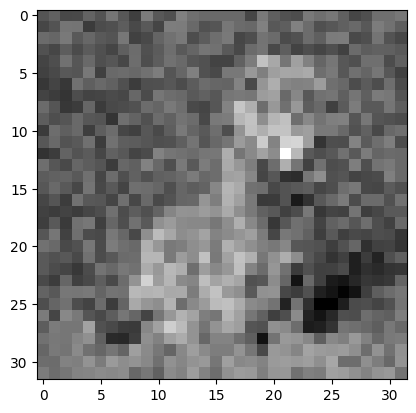

In [5]:
plt.imshow(np.array(img_bw), cmap="gray")
print(np.array(img_bw).min(), np.array(img_bw).max())
plt.show()

plt.imshow(randomized_img, cmap="gray")
print(randomized_img.min(), randomized_img.max())
plt.show()

In [6]:
#Apply random transformation

def random_rotate(ori_img):
  myimg = ori_img.copy()
  angle = random.uniform(0, 360)
  rot = rotate(myimg, angle, reshape=True)

  return rot

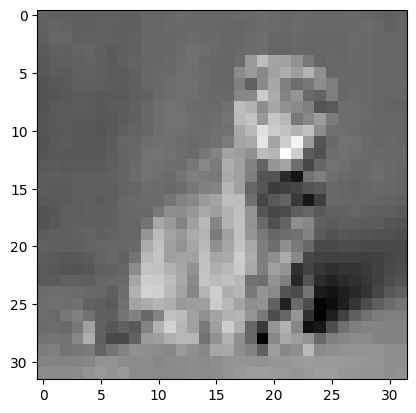

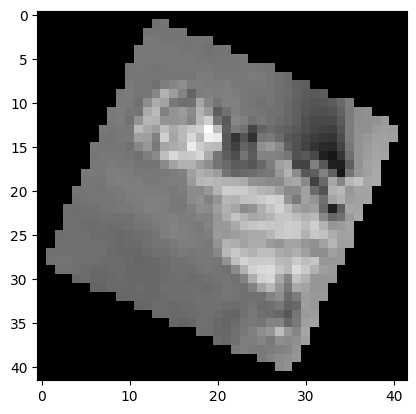

In [7]:
randomized_img = random_rotate(np.array(img_bw))

plt.imshow(np.array(img_bw), cmap="gray")
plt.show()

plt.imshow(randomized_img, cmap="gray")
plt.show()

In [8]:
!pip install kornia

In [9]:
import kornia
import torch as T
import torch.nn as nn

In [10]:
#Using kornia

img = T.from_numpy(np.array(img_bw)).float()
img = img.unsqueeze(0).unsqueeze(0) #add dimensions
imgs = img.repeat(16, 1, 1, 1)  # Simulate having multiple batches

noise = kornia.augmentation.AugmentationSequential(
    #Applies affine transforms: rotation, translation, scaling, shear
    #Straight lines stay straight.
    #Parallel lines remain parallel.
    #No depth / projective distortion.
    kornia.augmentation.RandomAffine(
        degrees=(0,360), #Set to 0 to deactivate rotations.
        translate=[0.1, 0.1], #horizontal shift
        scale=[0.9, 1.1],
        shear=[-10, 10],
        p=1 #probability of applying the transformation
    ),
    #Applies a projective (homography) transform.
    #Straight lines stay straight, but
    #Parallel lines do not have to remain parallel.
    #Simulates viewpoint / camera tilt.
    kornia.augmentation.RandomPerspective(0.6, p=1),
    same_on_batch=False
)

#noise.train()
augmented_imgs = noise(imgs)

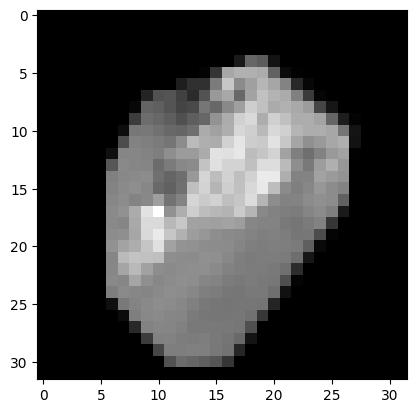

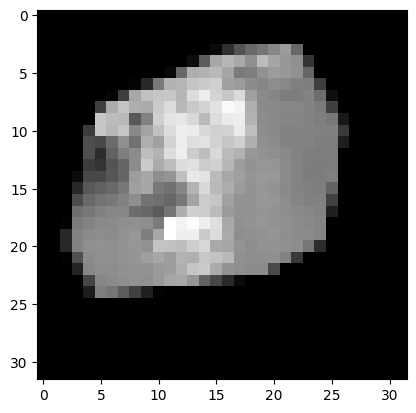

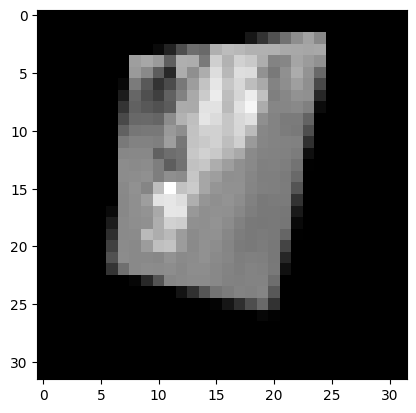

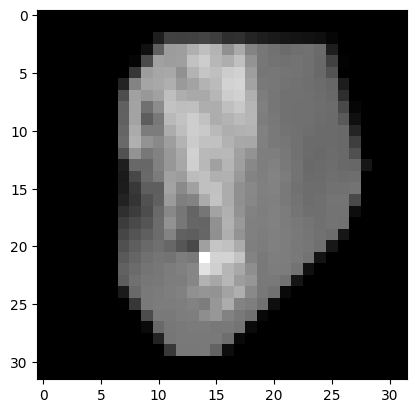

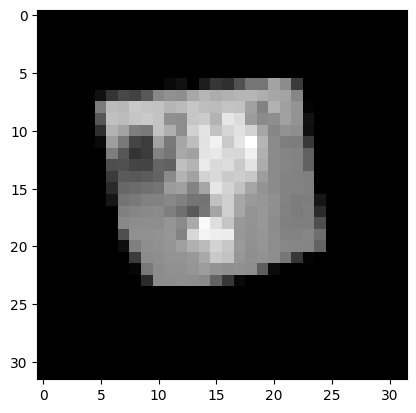

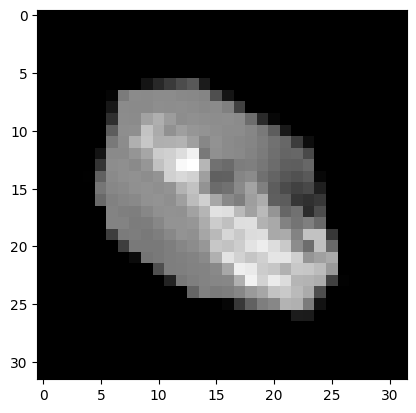

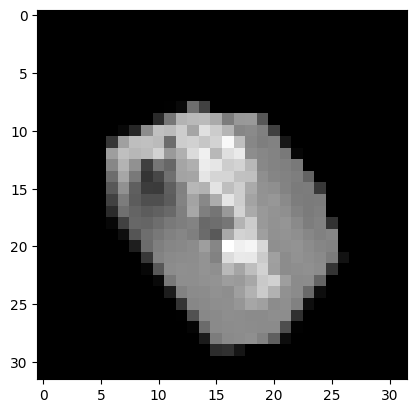

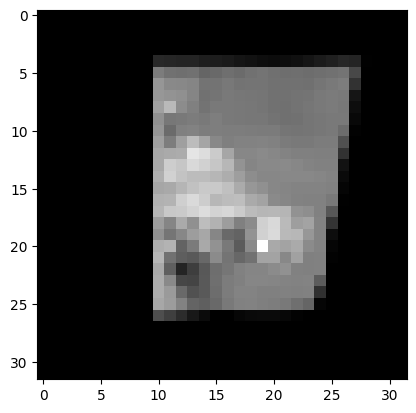

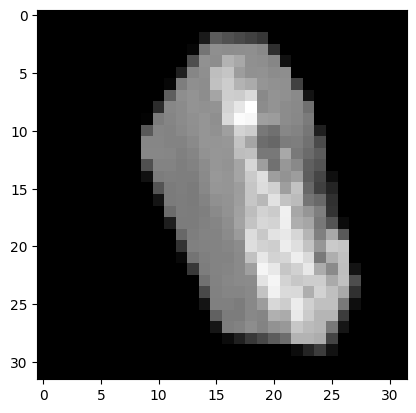

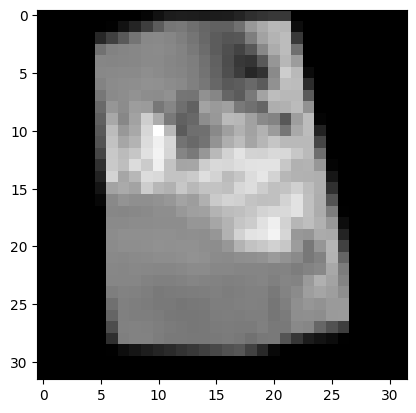

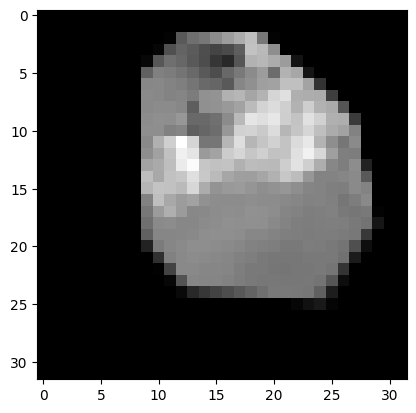

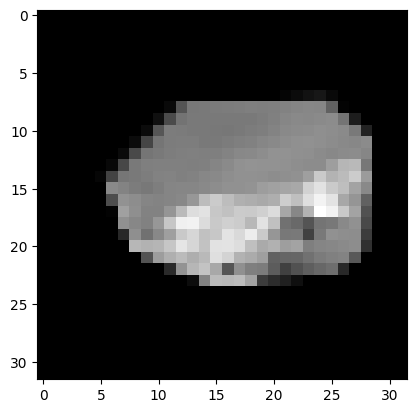

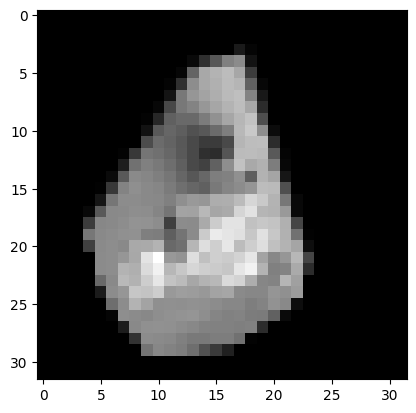

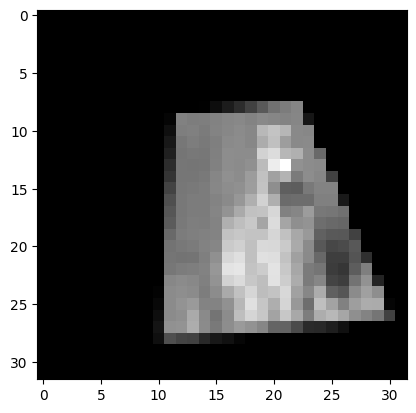

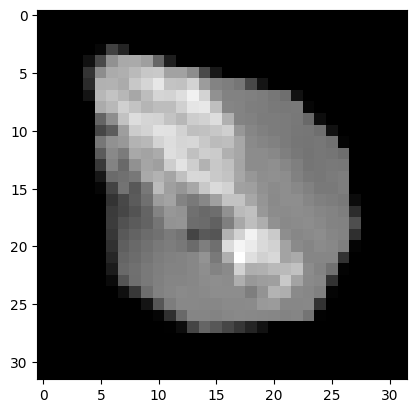

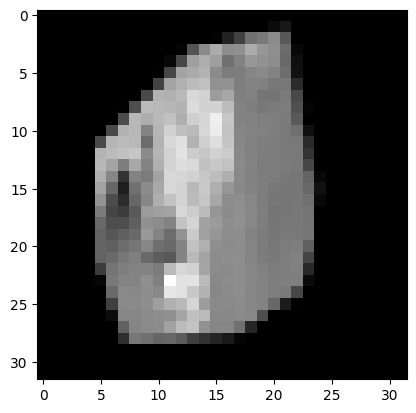

In [11]:
for i in range(16):
  plt.imshow(augmented_imgs[i,0,:,:], cmap='gray')
  plt.show()